# Exercise 7

* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).
* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).
* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

In [22]:
#IMPORTS napmlamamalamam
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import plotly.express as px


In [23]:
#DATA RETRIEVAL

df = pd.read_csv("../data/mushrooms/mushroomdata.csv")

dummy = pd.get_dummies(df)



2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


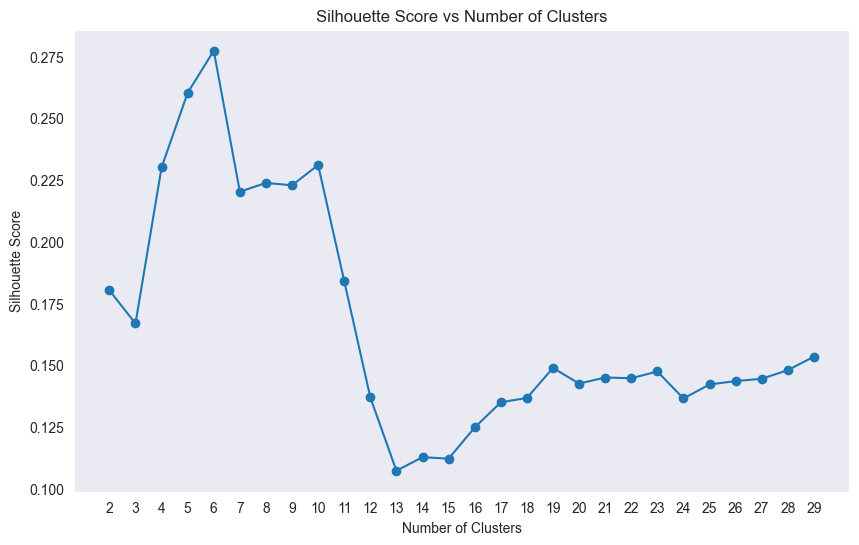

In [24]:
cluster_range = range(2,30)
silhouette_scores = []

for cluster_count in cluster_range:
    print(cluster_count)
    kmeans = KMeans(n_clusters=cluster_count, random_state=13)
    cluster_labels = kmeans.fit_predict(dummy)
    silhouette_scores.append(silhouette_score(dummy, cluster_labels))    
    
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid()
plt.show()

#k means fungerer best for sfæriske former, ikke avlange

#antakeligvis vil man ha 5-6 clustere

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#Siden vi har mer enn 5 dimensjoner bruker jeg pca for å visualisere det?

pipeline = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=False)),  
    ('pca', PCA(n_components=3))
])

pca_values = pipeline.fit_transform(dummy)
pca_df = pd.DataFrame(pca_values, columns=['PC1', 'PC2', 'PC3'])



n_clusters = 5
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(dummy)


pca_df['Cluster'] = cluster_labels



fig = px.scatter_3d(
    pca_df,
    x='PC1',
    y='PC2',
    z='PC3',
    title='3D PCA of Mushroom Dataset',
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2',
            'PC3': 'Principal Component 3'},
    color='Cluster',  
    opacity=0.8
)

fig.update_layout(
    height=800,
    margin=dict(b=0)
)

fig.update_traces(marker=dict(size=1))

fig.show()